# What & Why of Linear Algebra

(huge shoutout to my colleague Victor, from whom I stole much of this notebook)

## Scalars, Vectors, Matrices, Tensors: It's all about the dimension

![different_tensors.png](images/different_tensors.png)

**Tensors** are a general entity/way of understanding space and numbers which have *ranks* (or *orders*)

- **Scalar**: a 0-rank tensor
- **Vector**: a 1st-rank tensor
- **Matrix**: a 2nd-rank tensor

You can have higher-rank tensors, for example a 3rd-rank tensor that captures an image across three color channels (RGB)

## Creating with NumPy

In [2]:
import numpy as np

In [ ]:
# Scalar
s = np.arange(1)
display(s)

In [ ]:
# Vector
v = np.arange(4)
display(v)

# Other ways to define vector
x = np.linspace(-np.pi, np.pi, 10)
display(x)

In [ ]:
# Matrix
M = np.arange(4 * 2).reshape((4, 2))
display(M)

In [ ]:
# 3D Tensor
T_3d = np.arange(3 * 2 * 3).reshape((3, 2, 3))
display(T_3d)

### Indexing with NumPy

#### Different parts of a vector

In [ ]:
# For Vectors
display(v[1:4])  # second to fourth element. Element 5 is not included
display(v[::2])  # every other element
display(v[:])    # print the whole vector
display(v[::-1]) # reverse the vector!

#### Different parts of a matrix

In [ ]:
display(M[0, 0])   # element at first row and first column

In [ ]:
display(M[-1, -1]) # element at last row and last column 

In [ ]:
display(M[0, :])   # first row and all columns

In [ ]:
display(M[:, 0])   # all rows and first column 

In [ ]:
display(M[:])      # all rows and all columns

#### Different parts of a tensor

In [ ]:
print(T_3d[0])      # 2D: First matrix

In [ ]:
print(T_3d[0, 0])   # 1D: First matrix's first vector

In [ ]:
print(T_3d[0, 0, 0]) # 0D: First matrix's first vector's first element

In [ ]:
print(T_3d[0, 0, :])  # 1D: first matrix, first vector, all elements

In [ ]:
print(T_3d[0, :, 0])  # 1D: first matrix, all the vectors, just the fist element

In [ ]:
print(T_3d[0, :, 1:]) # 2D: first matrix, all the vectors, all elements after the first

# Basic Properties

## Shape

Can help us know the dimensions and size

In [ ]:
print('Scalar:')
s = np.array(100)
print(s)
display(s.shape)
display(s.size)

In [ ]:
print('Vector:')
print(v)
display(v.shape)
display(v.size)

In [ ]:
print('Matrix:')
print(M)
display(M.shape)
display(M.size)

In [ ]:
print('3D Tensor:')
print(T_3d)
display(T_3d.shape)
display(T_3d.size)

## Transpose

![transpose_tensors.png](images/transpose_tensors.png)

In [ ]:
display(M.shape)
print(M)

display(M.T.shape)
# Alternative to: M.T
print(np.transpose(M))

In [ ]:
display(T_3d.shape)
print(T_3d)

display(T_3d.T.shape)
print(T_3d.T)

# Combining Tensors

> Note: NumPy is pretty smart when you combine tensors; it will attempt to combine even if the dimensions don't match. This is called broadcasting & you can read about it in the documentation [https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

In [ ]:
A = np.arange(3*2).reshape(3,2)
B = 10 * np.arange(3*2).reshape(3,2)

print('A:\n', A)
print()
print('B:\n', B)

## Addition

In [3]:
A = np.arange(3*2).reshape(3,2)
B = 10 * np.arange(3*2).reshape(3,2)

print('A:\n', A)
print()
print('B:\n', B)

A:
 [[0 1]
 [2 3]
 [4 5]]

B:
 [[ 0 10]
 [20 30]
 [40 50]]


In [4]:
# We can add up the same dimensions! (elementwise)
A + B

array([[ 0, 11],
       [22, 33],
       [44, 55]])

### What happens when we have different dimensions? Broadcasting happens

In [5]:
# we can add scalars to the whole array (as you might expect)
A + 100

array([[100, 101],
       [102, 103],
       [104, 105]])

In [6]:
# 3-by-2 add 1-by-2
x = 100*np.arange(2).reshape(2)
print(x)
print(f'Size of x: {x.shape}')
print(A)
print(f'Size of A: {A.shape}')
print()
print(A + x)

[  0 100]
Size of x: (2,)
[[0 1]
 [2 3]
 [4 5]]
Size of A: (3, 2)

[[  0 101]
 [  2 103]
 [  4 105]]


In [7]:
# 3-by-2 add 3-by-2
x = 100*np.arange(3*2).reshape(3,2)
print(x)
print(f'Size of x: {x.shape}')
print(A)
print(f'Size of A: {A.shape}')
print()
print(A + x)

[[  0 100]
 [200 300]
 [400 500]]
Size of x: (3, 2)
[[0 1]
 [2 3]
 [4 5]]
Size of A: (3, 2)

[[  0 101]
 [202 303]
 [404 505]]


In [8]:
# 3-by-2 add 2-by-3 --> Will this work?
x = x = 100*np.arange(2*3).reshape(2,3)
print(x)
print(f'Size of x: {x.shape}')
print(A)
print(f'Size of A: {A.shape}')
print()
print(A + x)

[[  0 100 200]
 [300 400 500]]
Size of x: (2, 3)
[[0 1]
 [2 3]
 [4 5]]
Size of A: (3, 2)



ValueError: operands could not be broadcast together with shapes (3,2) (2,3) 

## Multiplication (Hadamard Product & Dot Product)

### Hadamard Product

Result: Same dimensions (after broadcasting)

Like addition, but multiply the elements together. This however isn't very common.

In [9]:
print('A:\n', A.shape)
print(A)
print()
print('B:\n', B.shape)
print(B)

A:
 (3, 2)
[[0 1]
 [2 3]
 [4 5]]

B:
 (3, 2)
[[ 0 10]
 [20 30]
 [40 50]]


In [10]:
print(A * B)

[[  0  10]
 [ 40  90]
 [160 250]]


In [11]:
# 3-by-2 add 1-by-2
x = 100*np.arange(2).reshape(2)
print(x)
print(f'Size of x: {x.shape}')
print(A)
print(f'Size of A: {A.shape}')
print()
print(A * x)

[  0 100]
Size of x: (2,)
[[0 1]
 [2 3]
 [4 5]]
Size of A: (3, 2)

[[  0 100]
 [  0 300]
 [  0 500]]


In [12]:
# 3-by-2 add 3-by-2
x = 100*np.arange(3*2).reshape(3,2)
print(x)
print(f'Size of x: {x.shape}')
print(A)
print(f'Size of A: {A.shape}')
print()
print(A * x)

[[  0 100]
 [200 300]
 [400 500]]
Size of x: (3, 2)
[[0 1]
 [2 3]
 [4 5]]
Size of A: (3, 2)

[[   0  100]
 [ 400  900]
 [1600 2500]]


In [13]:
# 3-by-2 add 2-by-3 --> Will this work?
x = x = 100*np.arange(3*2).reshape(2,3)
print(x)
print(f'Size of x: {x.shape}')
print(A)
print(f'Size of A: {A.shape}')
print()
print(A * x)

[[  0 100 200]
 [300 400 500]]
Size of x: (2, 3)
[[0 1]
 [2 3]
 [4 5]]
Size of A: (3, 2)



ValueError: operands could not be broadcast together with shapes (3,2) (2,3) 

### Dot Product

Result: (m-by-n) DOT (n-by-p) ==> (m-by-p)

$$A \cdot B = C$$

Likely the most common operation when we think of "multiplying" matrices.

In [14]:
print('A:\n', A.shape)
print(A)
print()
print('B:\n', B.shape)
print(B)

A:
 (3, 2)
[[0 1]
 [2 3]
 [4 5]]

B:
 (3, 2)
[[ 0 10]
 [20 30]
 [40 50]]


In [15]:
C = B.T
print('C:\n', C.shape)
print(C)

C:
 (2, 3)
[[ 0 20 40]
 [10 30 50]]


In [ ]:
# All the ways you can do the dot product
Z = np.dot(A, C)
# Z = A.dot(C)
# Z = A @ C

print(Z.shape)
print(Z)

### Cross Product

Produces another tensor of the same shape. The cross product of two vectors will be a vector that is perpendicular to both original vectors with a magnitude of A times B times the sine of the angle between A and B.

In [ ]:
print(A[:,0])
print(A[:,1])
print()

In [ ]:
print('result:', np.cross(A[:,0],A[:,1]))

# Manipulating Matrices (Identity & Inverse)

## Identity Matrix

Square matrix of diagonal 1's, rest are 0's

In [ ]:
I5 = np.eye(5)
print(I5)

When multiplying (dot product), you always get the same matrix (note that still has be compatible shape)

In [ ]:
A = np.arange(5*5).reshape(5,5)
print(A)

In [ ]:
print(I5 @ A)
print()
print(A @ I5)
print()
is_equal = (I5 @ A) == (A @ I5)
print('Both are the same:')
print(is_equal)

## Inverse Matrix

Remember that we can't divide by a matrix, but we can do something similar by finding an **inverse matrix**

In [ ]:
# Define two arrays
X = np.array([1,-2,3,2,-5,10,0,0,1]).reshape(3,3)
print(X)
print()
Y = np.array([5,-2,5,2,-1,4,0,0,1]).reshape(3,3)
print(Y)

In [ ]:
# What happens when these are multiplied?
print(X @ Y)
print()
print(Y @ X)

We can also find the inverse of a matrix with NumPy

In [ ]:
A = np.array([4,2,1,4,8,3,1,1,0]).reshape(3,3)
# Finding the inverse matrix
A_inv = np.linalg.inv(A)
print(A_inv)

In [ ]:
# Note the rounding
print(A @ A_inv)

However, not all matrices have an inverse

In [ ]:
A = np.arange(9).reshape(3,3)
print(A)
print()
print(np.linalg.inv(A))

## Solving Systems of Equations

Solving a system of equations can take a lot of work

$$ x - 2y + 3z = 9 $$
$$ 2x - 5y + 10z = 4 $$
$$ 0x + 0y + 6z = 0 $$

But we can make it easier by writing it in matrix form

$$ 
\begin{pmatrix} 
    1 & -2 & 3 \\
    2 & -5 & 10 \\
    0 & 0 & 6
\end{pmatrix}
\cdot
\begin{pmatrix} 
    x \\
    y \\
    z
\end{pmatrix}
=
\begin{pmatrix} 
    9 \\
    4 \\
    0
\end{pmatrix}
$$

We can think of this in the abstract:
$$ A \cdot X = B $$
$$ A^{-1} \cdot A \cdot X = A^{-1} \cdot B $$
$$ I \cdot X = A^{-1} \cdot B $$
$$ X = A^{-1} \cdot B $$

### Using NumPy

In [16]:
# Define the system's matrices
A = np.array([
    [1, -2,  3],
    [2, -5, 10],
    [0,  0,  6]
])

B = np.array([9,4,0]).reshape(3,1)
print('A:')
print(A)
print()
print('B:')
print(B)

A:
[[ 1 -2  3]
 [ 2 -5 10]
 [ 0  0  6]]

B:
[[9]
 [4]
 [0]]


In [17]:
# Find the inverse
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 5.         -2.          0.83333333]
 [ 2.         -1.          0.66666667]
 [ 0.          0.          0.16666667]]


In [18]:
# Solutions:
solution = A_inv @ B
print(solution)

[[37.]
 [14.]
 [ 0.]]


In [19]:
# Checking solutions:

print('x - 2y + 3z = 9')
print(f'{solution[0][0]} + {-2*solution[1][0]} + {3*solution[2][0]}')
print(solution[0][0] + -2*solution[1][0] + 3*solution[2][0])
print()

print('2x - 5y + 10z = 4')
print(f'{2*solution[0][0]} + {-5*solution[1][0]} + {10*solution[2][0]}')
print(2*solution[0][0] + -5*solution[1][0] + 10*solution[2][0])
print()

print('0x + 0y + 6z = 0')
print(f'{0*solution[0][0]} + {0*solution[1][0]} + {6*solution[2][0]}')
print(0*solution[0][0] + 0*solution[1][0] + 6*solution[2][0])
print()

x - 2y + 3z = 9
37.0 + -28.0 + 0.0
9.0

2x - 5y + 10z = 4
74.0 + -70.0 + 0.0
4.0

0x + 0y + 6z = 0
0.0 + 0.0 + 0.0
0.0



### But Linear Regression with Systems of Equations ...?

This is actually computationally expensive for large systems 😭

Remember, Linear Regression boils down to a complicated version of $y = mx + b$

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('data/kc_house_data.csv')

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [23]:
example = df[['sqft_living', 'price']].head()

example

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


If we assume price is just a factor of the living square feet, then the goal here is to find some coefficient that explains how `sqft_living` should be transformed to arrive at `price`.

In [24]:
x = example['sqft_living']
y = example['price']

In [25]:
X = np.asarray([np.ones(5), x]).T # add ones to allow for an intercept

X

array([[1.00e+00, 1.18e+03],
       [1.00e+00, 2.57e+03],
       [1.00e+00, 7.70e+02],
       [1.00e+00, 1.96e+03],
       [1.00e+00, 1.68e+03]])

In [26]:
from numpy.linalg import inv

# just using numpy to find our coefficients!
beta_0, beta_1 = inv(X.T @ X) @ X.T @ y
print(f"Intercept: {beta_0}, sqft_living coefficient: {beta_1}")

Intercept: 13305.249137877196, sqft_living coefficient: 243.55070518512395


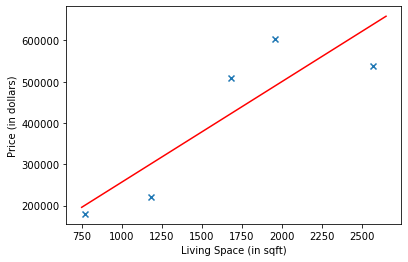

In [27]:
x_lin_space = np.linspace(750, 2650, 100) # for the line to plot properly
y_hat = beta_0 + beta_1 * x_lin_space

plt.scatter(x, y, marker='x') # plotting our actual values
plt.plot(x_lin_space, y_hat, color='r') # now our line of best fit

plt.ylabel("Price (in dollars)")
plt.xlabel("Living Space (in sqft)")
plt.show()

Intercept: 13305.249137877707, sqft_living coefficient: 243.55070518512386


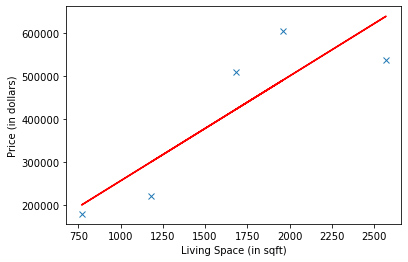

In [28]:
# another way to do it! 
# from Regression Analysis using Linear Algebra and NumPy - Code Along
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit function to get c(intercept) and m(slope)
# the degree parameter = 1 to models this as a straight line
c, m = polyfit(x, y, 1)

print(f"Intercept: {c}, sqft_living coefficient: {m}")

# Plot the data points and line calculated from ployfit
plt.plot(x, y, 'x')
plt.plot(x, c + (m * x), '-',  color='r')

plt.ylabel("Price (in dollars)")
plt.xlabel("Living Space (in sqft)")
plt.show()

## SO WHAT??

https://www.analyticsvidhya.com/blog/2019/07/10-applications-linear-algebra-data-science/

## Additional Resources

- [The Essence of Linear Algebra](https://www.3blue1brown.com/essence-of-linear-algebra-page) by 3blue1brown - provides one of my favorite ways to think about math in the abstract, and to see how it's cool and all fits together (without actually going through and doing the math 😅) - [YouTube playlist available here](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
- [Scalars, Vectors, Matrices and Tensors - Linear Algebra for Deep Learning (Part 1)](https://www.quantstart.com/articles/scalars-vectors-matrices-and-tensors-linear-algebra-for-deep-learning-part-1/) from QuantStart - a thorough detailing of linear algebra specifically through the lens of data science. This first post is discussing the difference between different-rank tensors, but they have several other posts in this series

Free linear algebra courses:

- [Udacity](https://classroom.udacity.com/courses/ud953/)
- [Khan Academy](https://www.khanacademy.org/math/linear-algebra)